In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from AVN import *
import matplotlib.patheffects as pe

In [26]:
###Define colors code for plots:
from matplotlib import cm

##Get colors : 
cmap_name1 = cm.get_cmap('tab20', 20)
cmap_name2 = cm.get_cmap('tab20b', 20)
cmap_name3 = cm.get_cmap('tab20c', 20)
cmap_name4 = cm.get_cmap('tab10', 10)
cmap_name5 = cm.get_cmap('Set3', 12)

cmap1 = cmap_name1(np.linspace(0, 1, 20))
cmap2 = cmap_name2(np.linspace(0, 1, 20))
cmap3 = cmap_name3(np.linspace(0, 1, 20))
cmap4 = cmap_name4(np.linspace(0, 1, 10))
cmap5 = cmap_name5(np.linspace(0, 1, 12))

cmap = np.vstack([cmap1, cmap2, cmap3, cmap4, cmap5])
print(len(cmap))

82


In [27]:
dfM = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfM.csv")
dfM['N'] = dfM['N'].astype(int)

dfM.index = dfM.I.values ##count begin at 1 and not 0

#dfM = dfM.drop(['I'], axis=1)

print(len(dfM))

dfM.head()

27


,N,max_m,V2,plana,I,duration,v,swarms
1,180,1.7358,0.0403,0.0669,1,3.4026,0.000133,1
2,86,1.9626,0.0152,0.3706,2,2.0668,0.097782,2
4,69,0.7173,0.0093,0.4461,4,1.9180,0.112986,4
5,90,1.5348,0.0229,0.4009,5,4.0596,0.036495,5
8,161,2.1737,0.0259,0.6164,8,3.6663,0.060144,8


In [28]:
path_to_df0 = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/catalog_all/"

####Raw data:
df0 = pd.read_csv(path_to_df0+'raw_data_modified_version.csv')
###Structure : t, x, y, z, m, x_km, y_km

###Swarms obtained by after ETAS & seismicity rate & checking step:
df_swarms = pd.read_csv('/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/new_df_final_swarms_of_v0_d03_n50_every1.csv')

###Create a column of swarms number:
df0["swarms_num"] = np.zeros(len(df0)) -1

for i in range(0, len(df_swarms)):
    select_swarms = df0.index[(df0.t >= df_swarms.t1.iloc[i])&(df0.t <= df_swarms.t2.iloc[i])
                       & (df0.x >= df_swarms.x1.iloc[i])&(df0.x <= df_swarms.x2.iloc[i])
                       & (df0.y >= df_swarms.y1.iloc[i])&(df0.y <= df_swarms.y2.iloc[i])
                       & (df0.z >= df_swarms.z1.iloc[i])&(df0.z <= df_swarms.z2.iloc[i])]
    
    df0.swarms_num.iloc[select_swarms] = i +1    
    
    
print(df0["swarms_num"].max()+1)

df0["swarms_num"] = df0["swarms_num"].astype('int')

list_swarms = np.unique(df0["swarms_num"].values)

###Remove all rows with a magnitude equal to a nan value:
df0 = df0.dropna()

df0.index = np.arange(0, len(df0))

###Define AVN MS:
A, V, N, df_AVN = AVN(df0)

###Rescale on Norcia event:
xN_km = df0.x_km - N.x_km
yN_km = df0.y_km - N.y_km

df0["xN_km"] = xN_km
df0["yN_km"] = yN_km

###Redefine AVN MS:
A, V, N, df_AVN = AVN(df0)

C = df0[(df0.m >= 5)&(df0.t >= 156)] ##Campotosto

df0_msup5 = df0[df0.m >= 5]

df0

41.0


,t,x,y,z,m,x_km,y_km,swarms_num,xN_km,yN_km
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,-1,17.251893,-19.029404
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-1,-59.026715,55.526032
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-1,77.159272,-49.540059
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-1,36.816640,-15.836915
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-1,53.320191,-54.320513
...,...,...,...,...,...,...,...,...,...,...
894438,365.996726,42.81393,13.10829,7.216,-0.325824,4760.691806,1069.225754,-1,-2.457408,-0.679474
894439,365.997166,42.80558,13.14988,3.126,0.304970,4759.763328,1072.763006,-1,-3.385886,2.857778
894440,365.997419,43.00835,13.14668,1.336,-0.183670,4782.310323,1068.979802,-1,19.161110,-0.925426
894441,365.999614,42.66073,13.21744,4.262,-0.273458,4743.656743,1080.795874,-1,-19.492471,10.890646


In [29]:
##Load data:
dfA = pd.read_csv("df_swarms_A.csv")
#dfA = dfA.drop(["rmq"], axis=1) ##restructure of dtaframe, run only once
#dfA = dfA.rename(columns={'z.1': 'z'}) ##restructure of dtaframe, run only once
#dfA.to_csv("df_swarms_A.csv", index = False) ##restructure of dtaframe, run only once
dfV = pd.read_csv("df_swarms_V.csv")
#dfV = dfV.rename(columns={'z.1': 'z'}) ##restructure of dtaframe, run only once
#dfV.to_csv("df_swarms_V.csv", index = False) ##restructure of dtaframe, run only once
dfN = pd.read_csv("df_swarms_N.csv")
#dfN = dfN.rename(columns={'z.1': 'z'}) ##restructure of dtaframe, run only once
#dfN.to_csv("df_swarms_N.csv", index = False) ##restructure of dtaframe, run only once
dfA.head()

,xN_km,yN_km,z,swarms_num,X,Y,Z,Exx,Eyy,Ezz,Eyz,Exz,Exy,dilatation
0,-7.746,4.235,5.962,0,4,-7,5.962,-0.000765,0.000150,0.000089,-0.000096,-0.000258,-0.000007,-0.000525
1,-35.720,29.830,10.327,1,30,-36,10.327,0.000026,-0.000012,-0.000006,-0.000021,0.000034,-0.000031,0.000009
2,8.242,3.324,4.940,2,3,8,4.940,0.000080,-0.000063,-0.000004,-0.000017,-0.000027,-0.000072,0.000013
3,-7.448,9.368,6.665,3,9,-7,6.665,-0.001666,0.003979,-0.003703,0.001492,-0.000586,-0.002251,-0.001391
4,7.139,7.190,3.311,4,7,7,3.311,0.000133,-0.000019,-0.000039,-0.000127,-0.000025,-0.000112,0.000076


In [30]:
##dP = - dilatation * E where E:Youg modulus, E = 8e5 Pa and dilatation is dimensionless
E = 8*(10**5) #bars, 1 bar = 10⁵ Pa, Pa = kg*(m^-1)*(s^-2), from Coulomb documentation, E in bar

all_dP = []
for i in range(0,len(dfA)):
    dP = []
    selectA = dfA[dfA.swarms_num == i]
    if not selectA.empty == True:
        dP.append(selectA.dilatation.values[0])
    selectV = dfV[dfV.swarms_num == i]
    if not selectV.empty == True:
        dP.append(selectV.dilatation.values[0])
    selectN = dfN[dfN.swarms_num == i]
    if not selectN.empty == True:
        dP.append(selectN.dilatation.values[0])
        
    dP = np.sum(dP)
    all_dP.append(-dP*E)
    
all_DP = np.array(all_dP)
print(all_dP)

[419.74988719999999, -7.0293431999999996, -10.355748800000001, 1112.419772, -60.470304799999994, -1107.7821736000001, 27.799230399999999, -0.050424799999999985, 668.23452399999996, -30.337683199999997, -1005.9909016, 922.08915759999991, -26.115301600000002, -55.520193599999999, -55.120260800000004, -1336.2580704, -48.868632000000005, -798.20122399999991, -1342.0813103999999, -3932.4518200000007, -646.56950240000003, -207.36114560000004, -799.54939760000002, -108.64861839999999, -102.2700512, -770.24517839999999, -35.504023999999994, 257.77412960000004, 390.00992880000001, -30.877500800000004, -23.167456000000001, -27.928658399999996, -557.75134400000013, 186.25659520000002, -286.06703120000003, -77.033231999999984, -349.85975680000001, 20.3095648, -28.908542400000002, 6.0732775999999999]


In [32]:
###Create a column of dP values:
df0["dP"] = np.zeros(len(df0)) -1

for i in range(0, len(df_swarms)):
    select_swarms = df0.index[(df0.t >= df_swarms.t1.iloc[i])&(df0.t <= df_swarms.t2.iloc[i])
                       & (df0.x >= df_swarms.x1.iloc[i])&(df0.x <= df_swarms.x2.iloc[i])
                       & (df0.y >= df_swarms.y1.iloc[i])&(df0.y <= df_swarms.y2.iloc[i])
                       & (df0.z >= df_swarms.z1.iloc[i])&(df0.z <= df_swarms.z2.iloc[i])]
    
    df0.dP.iloc[select_swarms] = all_dP[i]     
    
    
df0

/home/xianglo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,t,x,y,z,m,x_km,y_km,swarms_num,xN_km,yN_km,dP
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,-1,17.251893,-19.029404,-1.0
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-1,-59.026715,55.526032,-1.0
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-1,77.159272,-49.540059,-1.0
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-1,36.816640,-15.836915,-1.0
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-1,53.320191,-54.320513,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
894438,365.996726,42.81393,13.10829,7.216,-0.325824,4760.691806,1069.225754,-1,-2.457408,-0.679474,-1.0
894439,365.997166,42.80558,13.14988,3.126,0.304970,4759.763328,1072.763006,-1,-3.385886,2.857778,-1.0
894440,365.997419,43.00835,13.14668,1.336,-0.183670,4782.310323,1068.979802,-1,19.161110,-0.925426,-1.0
894441,365.999614,42.66073,13.21744,4.262,-0.273458,4743.656743,1080.795874,-1,-19.492471,10.890646,-1.0


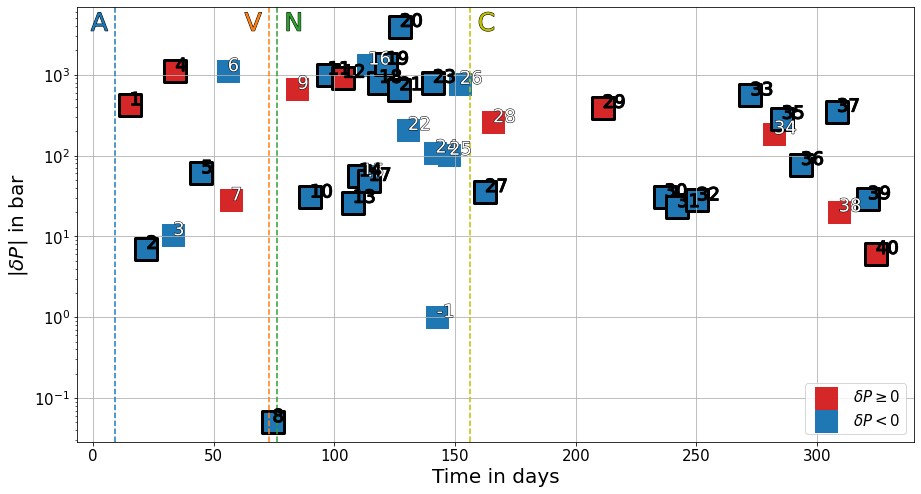

In [46]:
##Checking in time:
msz = 500
lsize=18

plt.figure(figsize=(15,8))

plt.annotate("A", 
            (A.t-10, 3.5*10**3),
            color='tab:blue', alpha =1, size=25, 
            path_effects=[pe.withStroke(linewidth=1, foreground="k")])
plt.annotate("V", 
            (V.t-10, 3.5*10**3),
            color='tab:orange', alpha =1, size=25, 
            path_effects=[pe.withStroke(linewidth=1, foreground="k")])
plt.annotate("N", 
            (N.t+3, 3.5*10**3),
            color='tab:green', alpha =1, size=25, 
            path_effects=[pe.withStroke(linewidth=1, foreground="k")])
plt.annotate("C", 
            (C.t.iloc[0]+3, 3.5*10**3),
            color='y', alpha =1, size=25, 
            path_effects=[pe.withStroke(linewidth=1, foreground="k")])

plt.axvline(x=A.t, ls='--', c='tab:blue')#, label="Amatrice seismic event")
plt.axvline(x=V.t, ls='--', c='tab:orange')#, label="Visso seismic event")
plt.axvline(x=N.t, ls='--', c='tab:green')#, label="Norcia seismic event")
plt.axvline(x=C.t.iloc[0], ls='--', c='y')#, label="Campotosto seismic events")
for i in list_swarms:
    select_swarm = df0[df0.swarms_num == i]
    if select_swarm.dP.iloc[0] >= 0 :
        if i == 1: 
            plt.scatter(select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0]), c='tab:red', marker='s', s=msz, label='$\delta P \geq 0$') ##when dP +
           
        plt.scatter(select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0]), c='tab:red', marker='s', s=msz) ##when dP +
        plt.annotate(str(i), (select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0])),
                    color='w', alpha =1, size=lsize,
                    #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
                     path_effects=[pe.withStroke(linewidth=1, foreground="k")]) 
    else:
        if i == 2:
            plt.scatter(select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0]), c='tab:blue', marker='s', s=msz, label='$\delta P < 0$') ##when dP -
            
        plt.scatter(select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0]), c='tab:blue', marker='s', s=msz) ##when dP -
        plt.annotate(str(i), (select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0])),
                    color='w', alpha =1, size=lsize,
                    #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
                     path_effects=[pe.withStroke(linewidth=1, foreground="k")])

for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False: 
        select_swarm = df0[df0.swarms_num == i]
        if select_swarm.dP.iloc[0] >= 0 :
            plt.scatter(select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0]), facecolors='tab:red', edgecolors='k', marker='s', s=msz, linewidths=3) ##when dP +
            plt.annotate(str(i), (select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0])),
                        color='k', alpha =1, size=lsize,
                        #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
                         path_effects=[pe.withStroke(linewidth=1, foreground="k")]) 
        else:
            I = df0[df0.swarms_num == i]
            plt.scatter(select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0]), facecolors='tab:blue', edgecolors='k', marker='s', s=msz, linewidths=3) ##when dP -
            plt.annotate(str(i), (select_swarm.t.mean(), np.abs(select_swarm.dP.iloc[0])),
                            color='k', alpha =1, size=lsize,
                            #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
                             path_effects=[pe.withStroke(linewidth=1, foreground="k")])
plt.yscale("log")
plt.xlabel('Time in days', fontsize=20)
plt.ylabel('$|\delta P|$ in bar', fontsize=20)
plt.tick_params(labelsize=15)
#plt.title("+:red, -:blue", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.grid()
plt.savefig("dP_changes.png")
plt.show()

## Cross-section profiles:

In [13]:
def deg2km (lat_deg, lon_deg):
    
    ##Convert ° to km :
    r = 6371 ##km
    C = 2*np.pi*r #km
    lat_km = lat_deg * C/360 #km
    lon_km = lon_deg * C * (np.cos(lat_deg*(np.pi/180)) / 360)
    
    return lat_km, lon_km

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [14]:
###Define the straight line extremities:

##The cross section (d1):
d1x = np.array([12.977, 13.386]) ##lon in °
d1y = np.array([42.775, 42.944]) ##lat in °

d1y, d1x = deg2km(d1y, d1x) #lat, lon
d1y, d1x = N.x_km - d1y, N.y_km - d1x

##Passing roughly through all points (d):
dx = N.y_km - np.array([1059.7, 1078.6]) #in km
dy = N.x_km - np.array([4780.0, 4749.9]) #in km

##Find their ax+b expression:
a = np.diff(dy)/np.diff(dx)
b = dy[0] - a*dx[0]

a1 = np.diff(d1y)/np.diff(d1x)
b1 = d1y[0] - a1*d1x[0]

##Only straight lines (d)&(d1) and our 2 points:
x = np.arange(dx[1], dx[0],1)
y = a*x+b

x1 = np.arange(d1x[1], d1x[0],1)
y1 = a1*x1+b1

###Find intersect point between (d) and (d1) position[0], and another point located on (d) position[1]:
X = N.y_km - np.array([1070.28, 1064.18])
Y = N.x_km - np.array([4763.24, 4773.17])

###Let's do our projection on the axis u and v:
u = [np.diff(X), np.diff(Y)]
u = u/np.sqrt(u[0]**2+u[1]**2)
v = np.array([u[1], -u[0]])
check = v[0]*u[0]+v[1]*u[1]
#print("check = ", check, "if == 0, perfect") ##ok!


pas_cs = [-25  -5  15  35  55  75]
pas_cs = -25 km
pas_cs = -5 km


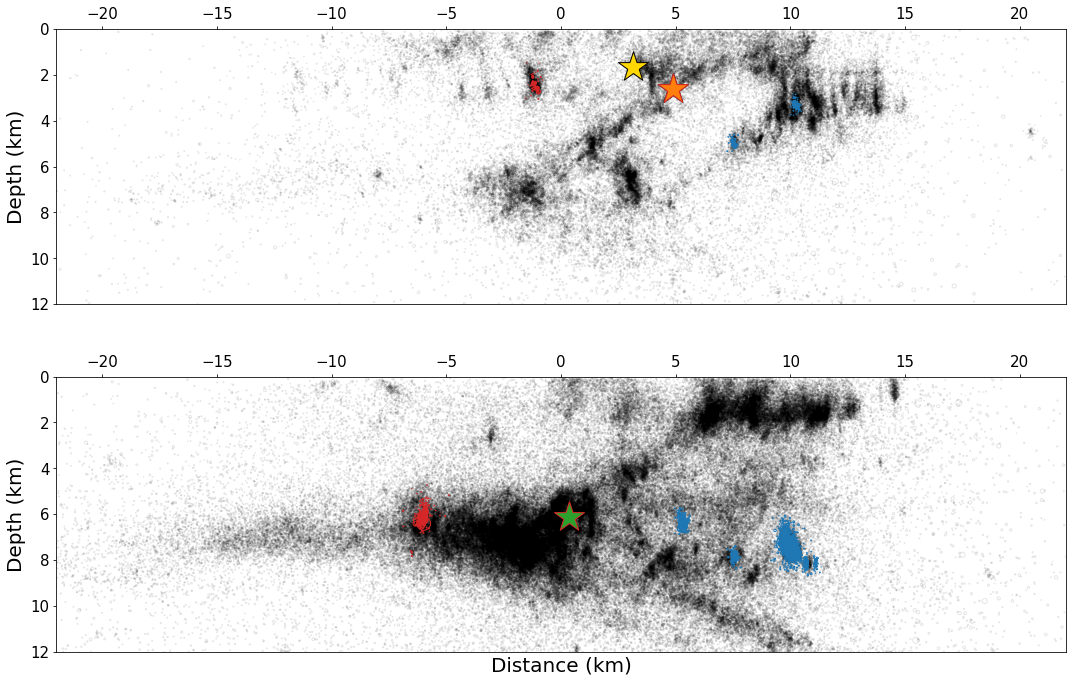

pas_cs = 15 km
pas_cs = 35 km


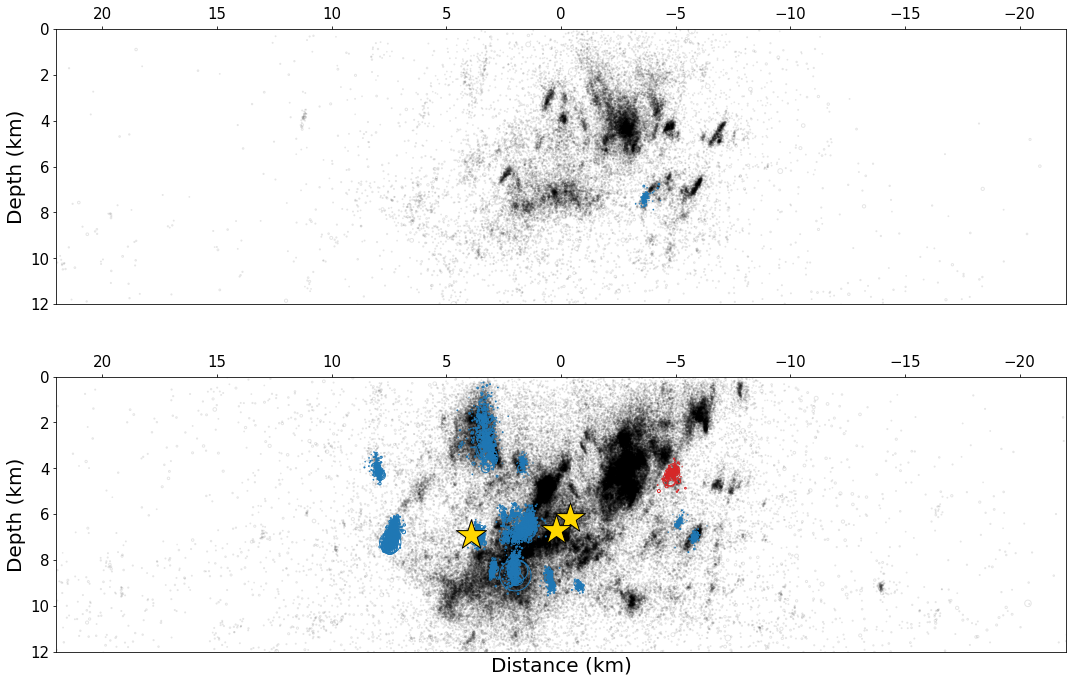

pas_cs = 55 km
pas_cs = 75 km
CPU times: user 13.8 s, sys: 365 ms, total: 14.2 s
Wall time: 14.1 s


In [24]:
%%time

#%matplotlib widget
msz = 1100
msz_stars = 1000

##Parameter:
pas = 20
pas_cs = np.arange(-25, 65+pas, pas) ##in km
# arg0 = np.argwhere(pas_cs == 0) ##remove 0
# pas_cs = np.delete(pas_cs, arg0)
for i, n in enumerate(pas_cs): ##replace 0 by 1
    if n == 0:
        pas_cs[i] = 1
        
print("pas_cs =", pas_cs)


all_A_prim = []
all_B_prim = []
all_x1_prim = []
all_y1_prim = []
all_inter = []
all_I_swarms_num = []

for i in range(0, len(pas_cs)):
    print("pas_cs =", pas_cs[i], "km")
    
    ##New coordinates:
    d1x_prim = x1[0] + (u[0] * pas_cs[i])
    d1y_prim = y1[0] + (u[-1] * pas_cs[i])
    A_prim = np.array([d1x_prim[0], d1y_prim[0]])
    
    d1x_prim = x1[-1] + (u[0] * pas_cs[i])
    d1y_prim = y1[-1] + (u[-1] * pas_cs[i])
    B_prim = np.array([d1x_prim[0], d1y_prim[0]])

    ##Find their ax+b expression:
    a1_prim = np.diff([A_prim[-1],B_prim[-1]])/np.diff([A_prim[0],B_prim[0]])
    b1_prim = d1y_prim[0] - a1*d1x_prim[0]

    ##Only straight line (d1'):
    x1_prim = np.arange(A_prim[0], B_prim[0],1)
    y1_prim = a1_prim*x1_prim+b1_prim

    ##Intersection between (d1') & (d):
    inter = line_intersection((A_prim, B_prim), ([x[0],y[0]], [x[-1], y[-1]]))
    
    all_A_prim.append(A_prim)
    all_B_prim.append(B_prim)
    all_x1_prim.append(x1_prim)
    all_y1_prim.append(y1_prim)
    all_inter.append(inter)
    
    ###Let's do our projection on the axis u and v:
    u_prim = [u[0]*pas_cs[i], u[-1]*pas_cs[i]]
    u_prim = u_prim/np.sqrt(u_prim[0]**2+u_prim[1]**2)
    v_prim = np.array([u_prim[1], -u_prim[0]])
    check_prim = v_prim[0]*u_prim[0]+v_prim[1]*u_prim[1]
    #print("check_prim = ", check_prim, "if == 0, perfect") ##ok!

    ###Centered all points on intersect point between (d) and (d1):
    df0_ = df0.copy()
    df0_["CI_xN_km"] = df0_.xN_km - inter[-1] ##lat
    df0_["CI_yN_km"] = df0_.yN_km - inter[0] ##lon

    xx = (df0_["CI_yN_km"]*u_prim[0])+(df0_["CI_xN_km"]*u_prim[-1])
    yy = (df0_["CI_yN_km"]*v_prim[0])+(df0_["CI_xN_km"]*v_prim[-1])

    df0_["CI_xxN_km"] = xx
    df0_["CI_yyN_km"] = yy

    ###Select points only with a distance from (d1) less than dist_param km:
    dist_param = pas/2 ##in km
    I = df0_[np.abs(df0_.CI_xxN_km) <= dist_param]

    I_swarms_num = np.unique(I.swarms_num.values)
    all_I_swarms_num.append(I_swarms_num)
    
    ###Redefine:
    A_, V_, N_, df_AVN_ = AVN(df0_)
    
    df0_m5_ = df0_[df0_.m >=5]
    
    if pas_cs[i] >= 0 : 
        xlim1, xlim2 = 22,-22
        
    else:
        xlim1, xlim2 = -22,22
        
        
    if (i == 1) or (i == 3):
        ##Plots:
        plt.figure(figsize=(15,10))
        plt.subplot(2,1,1)
        select_EQ = I[(I.swarms_num == -1) & (I.t < N.t)]
        plt.scatter(select_EQ.CI_yyN_km, select_EQ.z, s=np.exp(select_EQ.m), facecolors='none', edgecolors='k', linewidths=1, alpha=0.1)#, label="seismicity")
        for k in I_swarms_num[1:]:
            select_swarmsI = df0_[(df0_.swarms_num == k) & (df0_.t < N.t)]
            if not select_swarmsI.empty == True:
                if select_swarmsI.dP.iloc[0] >=0:
                    plt.scatter(select_swarmsI.CI_yyN_km, select_swarmsI.z, s=np.exp(2.5*select_swarmsI.m), facecolors='none', edgecolors='tab:red', linewidths=1)#, label='swarms n°'+str(int(k))) ##when dP + 
#                     plt.annotate(str(int(k)), (select_swarmsI.CI_yyN_km.mean(), select_swarmsI.z.mean()),
#                              color="white", alpha =1, size=15, 
#                              #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5), 
#                              path_effects=[pe.withStroke(linewidth=3, foreground="k")])

                else:
                    plt.scatter(select_swarmsI.CI_yyN_km, select_swarmsI.z, s=np.exp(1.5*select_swarmsI.m), facecolors='none', edgecolors='tab:blue', linewidths=1)#, label='swarms n°'+str(int(k))) ##when dP - 
#                     plt.annotate(str(int(k)), (select_swarmsI.CI_yyN_km.mean(), select_swarmsI.z.mean()),
#                          color="white", alpha =1, size=15, 
#                          #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5), 
#                          path_effects=[pe.withStroke(linewidth=3, foreground="k")])

        ##plotting EQ m >= 5 before Nocia event:
        common_items = set(df0_m5_["m"]) & set(I.m[I.t < N.t])
        df_common = df0_m5_[df0_m5_['m'].isin(common_items)]

        if not df_common.empty == True:
            plt.scatter(df_common.CI_yyN_km, df_common.z, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)

        if not I[(I.t == A.t)& (I.t < N.t)].empty == True :
            plt.scatter(A_.CI_yyN_km, A_.z, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
        if not I[(I.t == V.t)& (I.t < N.t)].empty == True :
            plt.scatter(V_.CI_yyN_km, V_.z, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
        if not I[(I.t == N.t)& (I.t < N.t)].empty == True :
            plt.scatter(N_.CI_yyN_km, N_.z, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)

        plt.tick_params(axis="both", labelsize=15)
        #plt.xlabel("Distance (km)", fontsize=15)
        plt.ylabel("Depth (km)", fontsize=20)
        #plt.title("Before Norcia mainshock", fontweight="bold", fontsize=15)
        plt.xlim(xlim1, xlim2)
        plt.ylim(0, 12)
        #plt.gca().get_xaxis().set_visible(False) ##hide x-axis

        ##Put the origin point to the top left corner:
        ax=plt.gca()                            # get the axis
        ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
        ax.xaxis.tick_top()                     # and move the X-Axis      
        ax.yaxis.tick_left()                    # remove right y-Ticks
        plt.gca().set_aspect('equal')

        plt.subplot(2,1,2)
        select_EQ = I[(I.swarms_num == -1) & (I.t >= N.t)]
        plt.scatter(select_EQ.CI_yyN_km, select_EQ.z, s=np.exp(select_EQ.m), facecolors='none', edgecolors='k', linewidths=1, alpha=0.1)#, label="seismicity")
        for j in I_swarms_num[1:]:
            select_swarmsI = df0_[(df0_.swarms_num == j) & (df0_.t >= N.t)]
            if not select_swarmsI.empty == True:
                if select_swarmsI.dP.iloc[0] >= 0:
                    plt.scatter(select_swarmsI.CI_yyN_km, select_swarmsI.z, s=np.exp(2.5*select_swarmsI.m), facecolors='none', edgecolors='tab:red', linewidths=1)#, label='swarms n°'+str(int(j))) ##when dP +
#                     plt.annotate(str(int(j)), (select_swarmsI.CI_yyN_km.mean(), select_swarmsI.z.mean()),
#                          color="white", alpha =1, size=15, 
#                          #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5), 
#                          path_effects=[pe.withStroke(linewidth=3, foreground="k")])

                else:
                    plt.scatter(select_swarmsI.CI_yyN_km, select_swarmsI.z, s=np.exp(2.5*select_swarmsI.m), facecolors='none', edgecolors='tab:blue', linewidths=1)#, label='swarms n°'+str(int(j))) ##when dP -
#                     plt.annotate(str(int(j)), (select_swarmsI.CI_yyN_km.mean(), select_swarmsI.z.mean()),
#                          color="white", alpha =1, size=15, 
#                          #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5), 
#                          path_effects=[pe.withStroke(linewidth=3, foreground="k")])

        ##plotting EQ m >= 5 after Nocia event:
        common_items = set(df0_m5_["m"]) & set(I.m[I.t >= N.t])
        df_common = df0_m5_[df0_m5_['m'].isin(common_items)]

        if not df_common.empty == True:
            plt.scatter(df_common.CI_yyN_km, df_common.z, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)

        if not I[(I.t == A.t)& (I.t >= N.t)].empty == True :
            plt.scatter(A_.CI_yyN_km, A_.z, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
        if not I[(I.t == V.t)& (I.t >= N.t)].empty == True :
            plt.scatter(V_.CI_yyN_km, V_.z, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
        if not I[(I.t == N.t)& (I.t >= N.t)].empty == True :
            plt.scatter(N_.CI_yyN_km, N_.z, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)

        plt.tick_params(axis="both", labelsize=15)
        plt.xlabel("Distance (km)", fontsize=20)
        plt.ylabel("Depth (km)", fontsize=20)
        #plt.title("After Norcia mainshock", fontweight="bold", fontsize=15)
        plt.xlim(xlim1, xlim2)
        plt.ylim(0, 12)
        #plt.gca().get_xaxis().set_visible(False) ##hide x-axis

        ##Put the origin point to the top left corner:
        ax=plt.gca()                            # get the axis
        ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
        ax.xaxis.tick_top()                     # and move the X-Axis      
        ax.yaxis.tick_left()                    # remove right y-Ticks
        plt.gca().set_aspect('equal')

        plt.tight_layout()
        plt.savefig("plot_cs_"+str(int(pas_cs[i]))+"km_within_"+str(int(dist_param))+"km_dP.png")
        plt.show()

In [16]:
###For paper, compute rectangle of cross section:
all_A_primx = np.zeros(len(all_A_prim))
all_A_primy = np.zeros(len(all_A_prim))
all_B_primx = np.zeros(len(all_A_prim))
all_B_primy = np.zeros(len(all_A_prim))

for i in range(0, len(all_A_prim)):
    all_A_primx[i] = all_A_prim[i][0]
    all_A_primy[i] = all_A_prim[i][1]
    all_B_primx[i] = all_B_prim[i][0]
    all_B_primy[i] = all_B_prim[i][1]
    

mean_all_A_primx = np.mean([all_A_primx[:-1],all_A_primx[1:]], axis=0)
mean_all_A_primy = np.mean([all_A_primy[:-1],all_A_primy[1:]], axis=0)
mean_all_B_primx = np.mean([all_B_primx[:-1],all_B_primx[1:]], axis=0)
mean_all_B_primy = np.mean([all_B_primy[:-1],all_B_primy[1:]], axis=0)

In [ ]:
from obspy.imaging.beachball import beach

##get moment tensor informations : https://www.globalcmt.org/CMTsearch.html

mtA = [-2.400, 0.533, 1.860, 0.016, -0.660, -0.985]
mtV = [-2.190, 0.302, 1.880, 0.188, -1.030, -0.652]
mtN = [-1.470, 0.233, 1.230, 0.196, -0.543, -0.627]

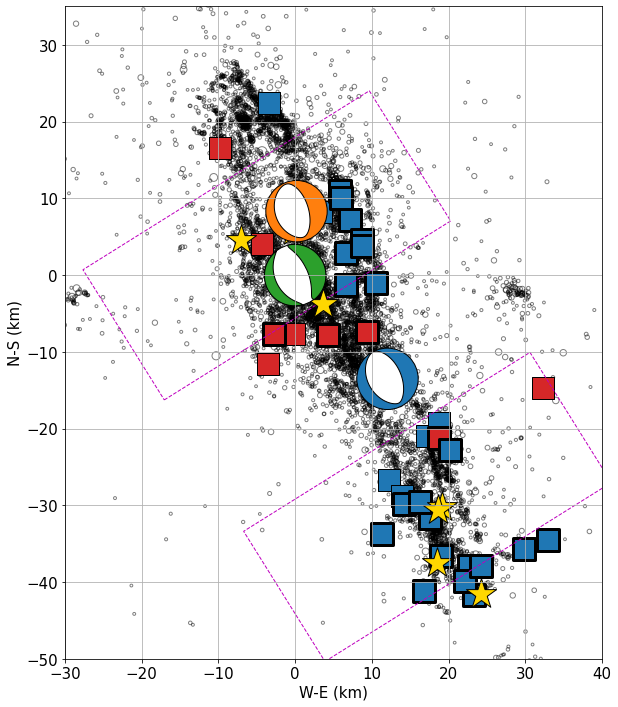

In [17]:
from matplotlib.patches import Rectangle

#%matplotlib widget
m_min = 2
msz = 500
msz_stars = 1000
msz_beach = 8

###############IN KM
plt.figure(figsize=(12,12))
##All EQ:
plt.scatter(df0.yN_km[df0.m >= m_min], df0.xN_km[df0.m >= m_min], s=np.exp(df0.m[df0.m >= m_min]), facecolors='none', edgecolors='k', linewidths=1, alpha=0.5)

##swarms clusters:
list_swarms = np.unique(df0.swarms_num)[1:]
for i in list_swarms:
    I = df0[df0.swarms_num == i]
    
    if I.dP.iloc[0] >= 0:
        plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors='tab:red', edgecolors='k', linewidths=1)
    
    else:
        plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors='tab:blue', edgecolors='k', linewidths=1)
    
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False: 
        I = df0[df0.swarms_num == i]
        if I.dP.iloc[0] >= 0:
            plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors='tab:red', edgecolors='k', linewidths=3)
        else:
            plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors='tab:blue', edgecolors='k', linewidths=3)
    
    
for k in range(0, len(mean_all_A_primx)):
    if k == 1:
        #add rectangle
        plt.gca().add_patch(Rectangle((mean_all_A_primx[k], mean_all_A_primy[k]),44,20,
                            angle=32,
                            edgecolor='m',
                            facecolor='none',
                            ls='--',
                            lw=1))
        
    elif k == 3:
        #add rectangle
        plt.gca().add_patch(Rectangle((mean_all_A_primx[k], mean_all_A_primy[k]),44,20,
                            angle=32,
                            edgecolor='m',
                            facecolor='none',
                            ls='--',
                            lw=1))
    ##44,10, or 44,20,
    
plt.scatter(df0_msup5.yN_km, df0_msup5.xN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.yN_km, A.xN_km, s=msz_stars, marker='*', linewidths=1)
plt.scatter(V.yN_km, V.xN_km, s=msz_stars, marker='*', linewidths=1)
plt.scatter(N.yN_km, N.xN_km, s=msz_stars, marker='*', linewidths=1)
ax=plt.gca()
bcA = beach(mtA, xy=(A.yN_km, A.xN_km), width=msz_beach, linewidth=1, facecolor='tab:blue')
bcA.set_zorder(1)
ax.add_collection(bcA)
bcV = beach(mtV, xy=(V.yN_km, V.xN_km), width=msz_beach, linewidth=1, facecolor='tab:orange')
bcV.set_zorder(1)
ax.add_collection(bcV)
bcN = beach(mtN, xy=(N.yN_km, N.xN_km), width=msz_beach, linewidth=1, facecolor='tab:green')
bcN.set_zorder(1)
ax.add_collection(bcN)
plt.xlabel("W-E (km)", fontsize=15)
plt.ylabel("N-S (km)", fontsize=15)
plt.tick_params(axis="both", labelsize=15)
plt.gca().set_aspect('equal', 'box')
plt.xlim(-30, 40)
plt.ylim(-50,35)
plt.grid(True)
plt.savefig("plot_all_cs_km_map_with_dP.png")
plt.show()